In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
     

In [2]:
data = pd.read_csv("C:/Users/İrem/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]
y = data.diagnosis.values 
x_data = data.drop(["diagnosis"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [6]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.20,random_state=42)
x_train = x_train.T
x_train.shape

(30, 455)

In [8]:
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
print(x_test.shape)

(30, 114)


In [9]:
y_train.shape

(455,)

In [10]:
y_test.shape

(114,)

In [11]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [12]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [13]:
sigmoid(0)

0.5

In [14]:
def forward_backward_propagation(w,b,x_train,y_train):

    # forward propagation
    z = np.dot(w.T,x_train) + b 
    y_head = sigmoid(z) 
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) 
    cost = (np.sum(loss))/x_train.shape[1]   

    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]  
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]              
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}

    return cost,gradients
     

In [15]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion): 
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train) 
        cost_list.append(cost) 
        w = w - learning_rate * gradients["derivative_weight"]  
        b = b - learning_rate * gradients["derivative_bias"]   
        if i % 10 == 0:
            cost_list2.append(cost) 
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"weight": w,"bias": b} 
    plt.plot(index,cost_list2) 
    plt.xticks(index,rotation='vertical') 
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list 

In [16]:
def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b) 
    Y_prediction = np.zeros((1,x_test.shape[1])) #(1,114) 
    
    for i in range(z.shape[1]): 
        if z[0,i]<= 0.5: 
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
                        
    return Y_prediction

Cost after iteration 0: 0.692977
Cost after iteration 10: 0.350527
Cost after iteration 20: 0.266641
Cost after iteration 30: 0.229564
Cost after iteration 40: 0.206850
Cost after iteration 50: 0.191037
Cost after iteration 60: 0.179152
Cost after iteration 70: 0.169757
Cost after iteration 80: 0.162063
Cost after iteration 90: 0.155600
Cost after iteration 100: 0.150061
Cost after iteration 110: 0.145243
Cost after iteration 120: 0.140998
Cost after iteration 130: 0.137221
Cost after iteration 140: 0.133830
Cost after iteration 150: 0.130766
Cost after iteration 160: 0.127978
Cost after iteration 170: 0.125428
Cost after iteration 180: 0.123084
Cost after iteration 190: 0.120920
Cost after iteration 200: 0.118915
Cost after iteration 210: 0.117051
Cost after iteration 220: 0.115311
Cost after iteration 230: 0.113683
Cost after iteration 240: 0.112156
Cost after iteration 250: 0.110720
Cost after iteration 260: 0.109365
Cost after iteration 270: 0.108086
Cost after iteration 280: 0.106

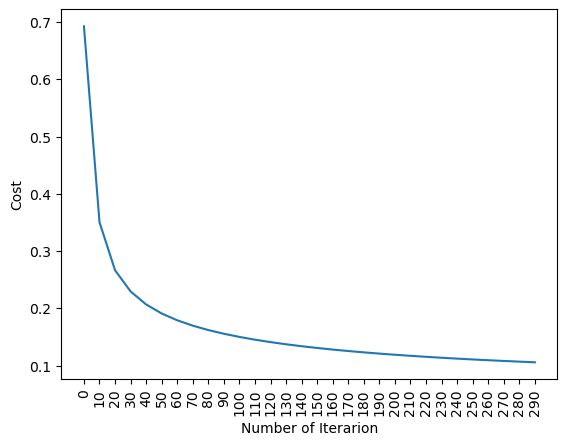

test accuracy: 97.36842105263158 %


In [17]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]  
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
   
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 3, num_iterations = 300)

In [18]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(random_state=42,max_iter=40)
lr.fit(x_train.T,y_train.T)

LogisticRegression(max_iter=40, random_state=42)

In [19]:
y_pred = lr.predict(x_test.T)
     

In [20]:
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))
     

test accuracy 0.9824561403508771


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [24]:
data = pd.read_csv("C:/Users/İrem/advertising_.csv")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [26]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

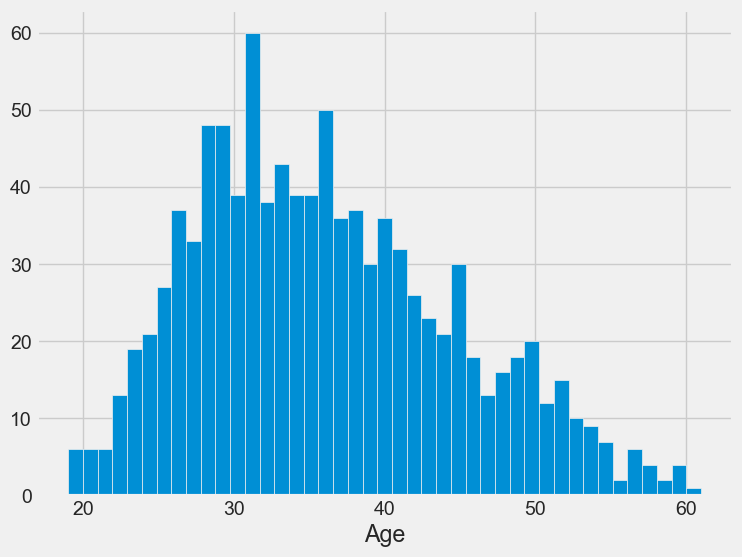

In [27]:
plt.figure(figsize=(8, 6))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')

<Figure size 800x600 with 0 Axes>

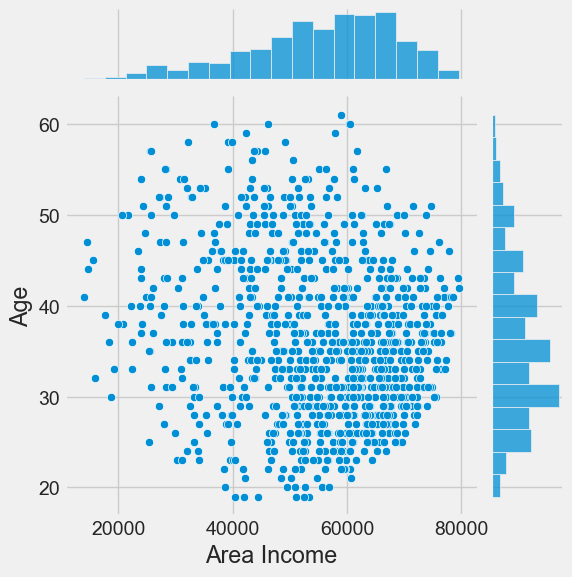

In [28]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Area Income"], y=data.Age)

<Figure size 800x600 with 0 Axes>

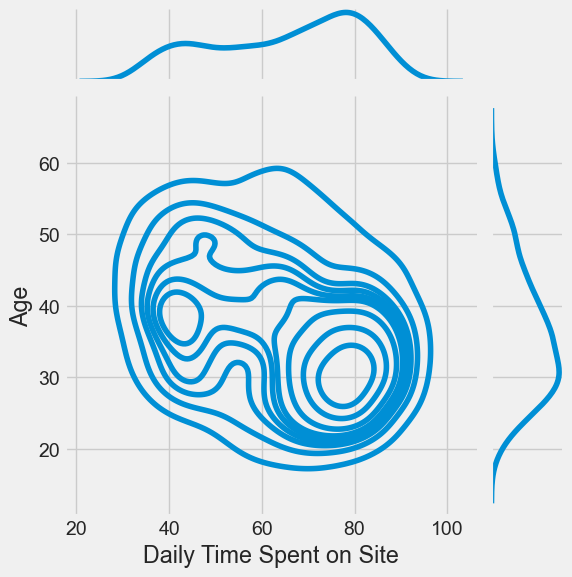

In [29]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Daily Time Spent on Site"], y=data.Age, kind='kde')

<Figure size 800x600 with 0 Axes>

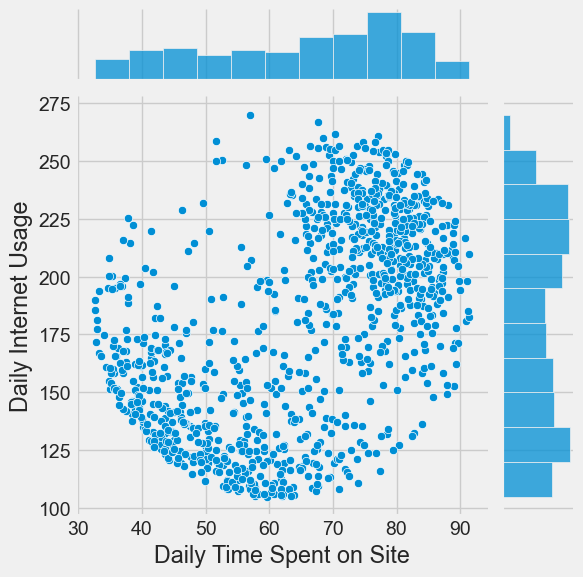

In [30]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Daily Time Spent on Site"], y=data["Daily Internet Usage"])

Text(0.5, 1.0, 'Sigmoid Function')

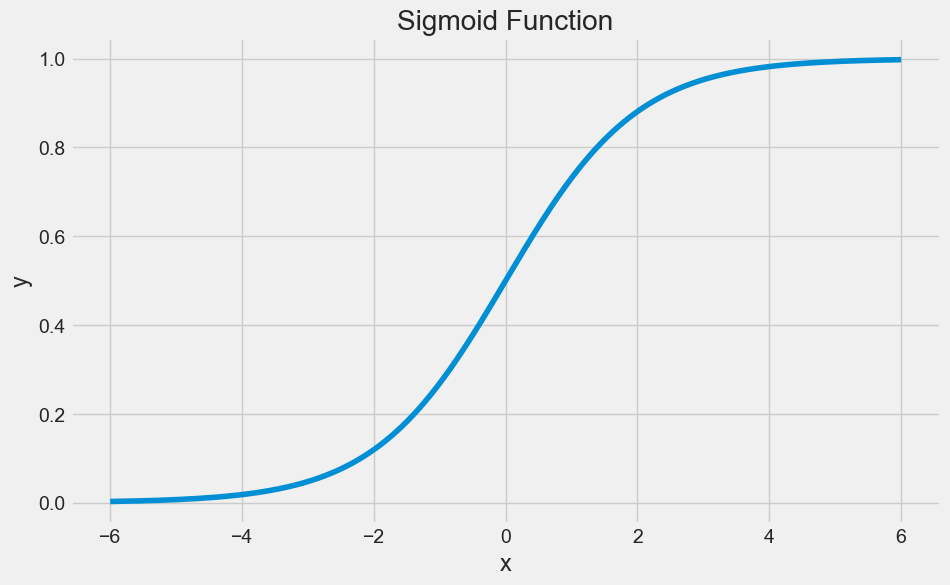

In [31]:
x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(10, 6))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid Function")